# Plotlib Examples

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
os.chdir('../library')

In [2]:
from plotlib import *
from fontlib import set_font_family
set_font_family()
colors = ['#66b3ff','#ff9999','#ffcc99']

## Stacked Bar

In [3]:
df = pd.read_csv('~/Documents/Github/covid-detector/data/train_data.csv')
# df = pd.read_csv('data.csv')
df.head()

,id,age,gender,respiratory_condition,fever_or_muscle_pain,covid19
0,1,24,female,0,1,0
1,2,51,male,0,0,0
2,3,22,male,0,0,0
3,4,29,female,1,0,0
4,5,23,male,0,0,0


In [4]:
df['gender'] = df['gender'].replace({'male':0,'female':1,'other':2})
categorical_features = ['gender','respiratory_condition','fever_or_muscle_pain']
names = {feature:name for feature,name in zip(df.columns,['ID','Age','Gender','Disease','Pain','COVID-19'])}
labels = {
    'gender': {0:'Male',1:'Female',2:'Other'},
    'respiratory_condition': {0:'Normal',1:'Illed'},
    'fever_or_muscle_pain': {0:'Normal',1:'Pained'},
    'covid19': {0:'Negative',1:'Positive'},
}

In [5]:
groupby_range(df, x='age', y='gender', xbins=5, ylabels=labels['gender'])

,Male,Female,Other
Total,0.684888,0.308279,0.006833
"(1, 19]",0.628125,0.325000,0.046875
"(19, 37]",0.719359,0.276060,0.004582
"(37, 54]",0.679002,0.318584,0.002414
"(54, 72]",0.623810,0.376190,0.000000
"(72, 90]",0.565789,0.434211,0.000000


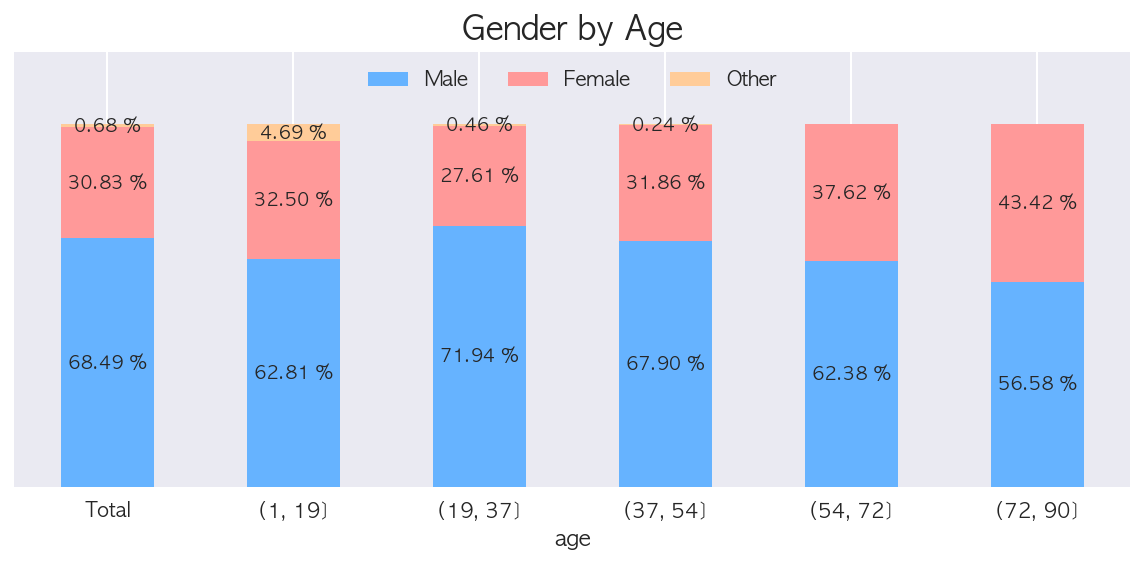

In [6]:
fig, ax = plt.subplots(1, figsize=(10,4))
draw_stacked_bar(df, x='age', y='gender', ax=ax, colors=colors,
                xbins=5, ylabels=labels['gender'], title='default', names=names)
plt.show()

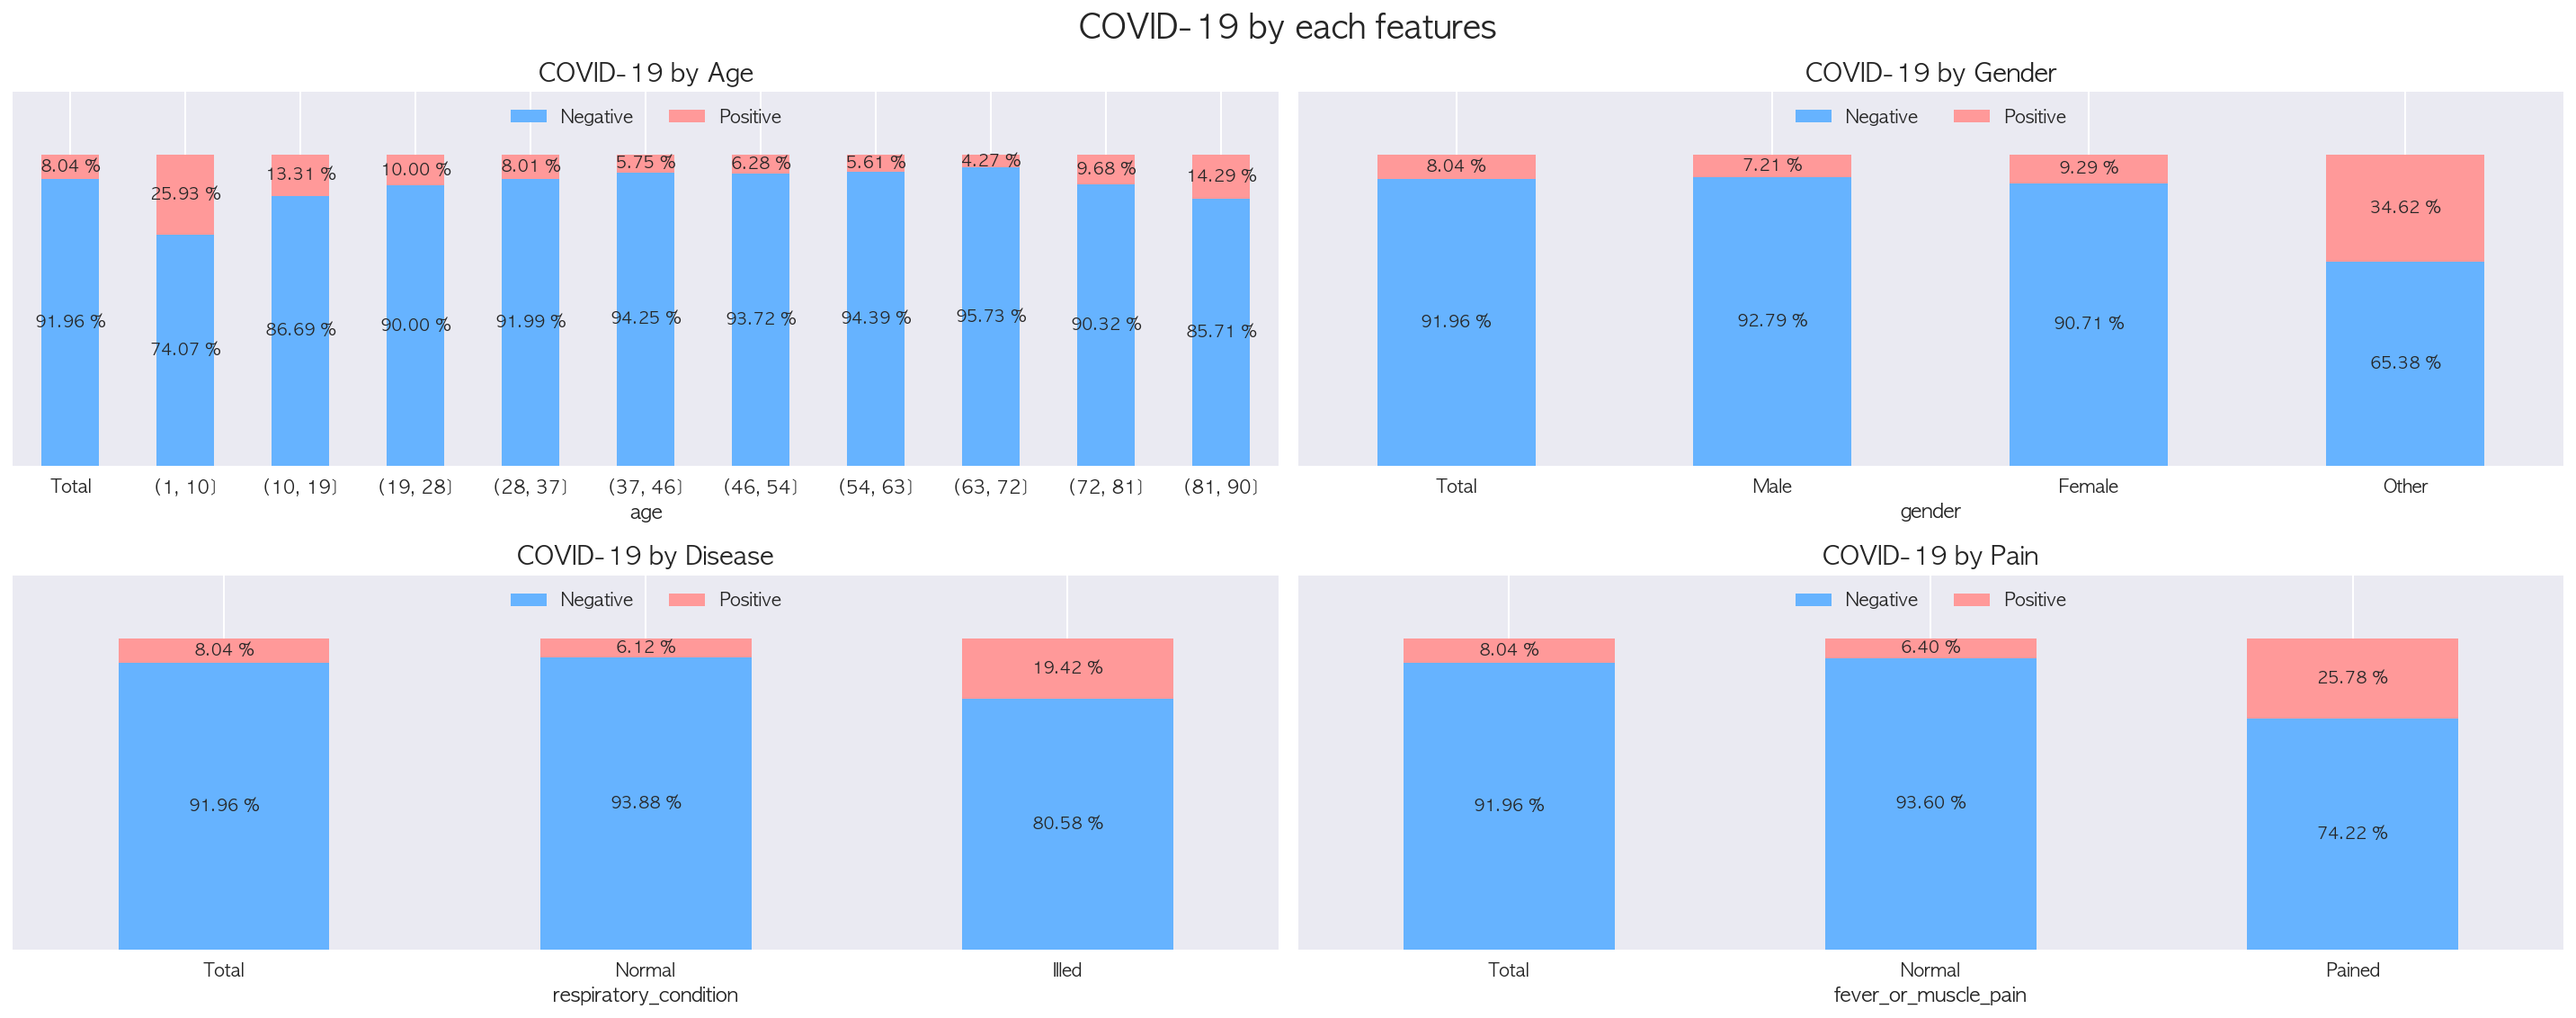

In [7]:
column = 'covid19'
features = ['age']+categorical_features
fig, ax = draw_stacked_bar_subplots(df, features, column, colors, (20,8), (2,2), xbins={'age':10},
                                    labels=labels, title=f'{names[column]} by each features', names=names)
plt.tight_layout()
plt.show()